<a href="https://colab.research.google.com/github/sllpwlkr/Frameworks_7sem_Lupanova/blob/main/PSFII_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №5: Градиентный бустинг

## Задача классификации

### 2. Создание бейзлайна и оценка качества

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Загрузка данных
df = pd.read_csv('apple_quality.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
#Предобработка данных
print(df.head(1))
print(df.describe())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336    5.34633    -1.012009     1.8449   0.32984   

        Acidity Quality  
0  -0.491590483    good  
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.8

In [5]:
#Удаление строк с пропущенными значениями
initial_rows = len(df)
df_clean = df.dropna()
rows_after_cleaning = len(df_clean)
rows_removed = initial_rows - rows_after_cleaning

print(f"\nКоличество строк до удаления пропусков: {initial_rows}")
print(f"Удалено строк с пропущенными значениями: {rows_removed}")

#Сохраняем очищенный df
df = df_clean.copy()


Количество строк до удаления пропусков: 4001
Удалено строк с пропущенными значениями: 1


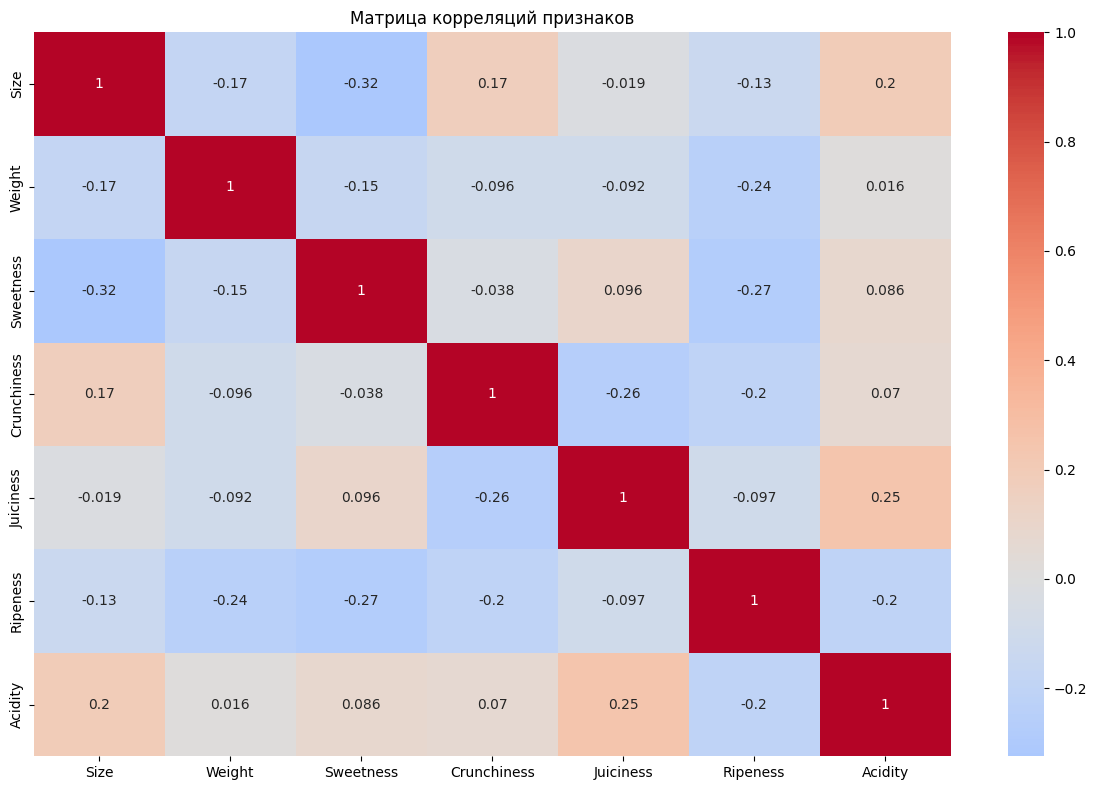

In [6]:
#Матрица корреляций
plt.figure(figsize=(12, 8))
numeric_df = df.drop(['A_id', 'Quality'], axis=1)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций признаков')
plt.tight_layout()
plt.show()

In [7]:
#Проверим баланс классов
print(df['Quality'].value_counts())

Quality
good    2004
bad     1996
Name: count, dtype: int64


In [8]:
#Преобразуем целевую переменную из категориального в чиловой признак
le = LabelEncoder()
df['Quality_encoded'] = le.fit_transform(df['Quality'])
print(f"\nКодирование классов: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Кодирование классов: {'bad': np.int64(0), 'good': np.int64(1)}


In [9]:
#Удаляем колонку с id и разделяем датасет на фичи и целевую переменную
X = df.drop(['A_id', 'Quality', 'Quality_encoded'], axis=1)
y = df['Quality_encoded']

In [10]:
#Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
#Бейзлайн модель и предсказания
base_model = GradientBoostingClassifier()
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)


GradientBoosting Baseline:
Accuracy: 0.8517
Precision: 0.8522
Recall: 0.8517
F1-score: 0.8516


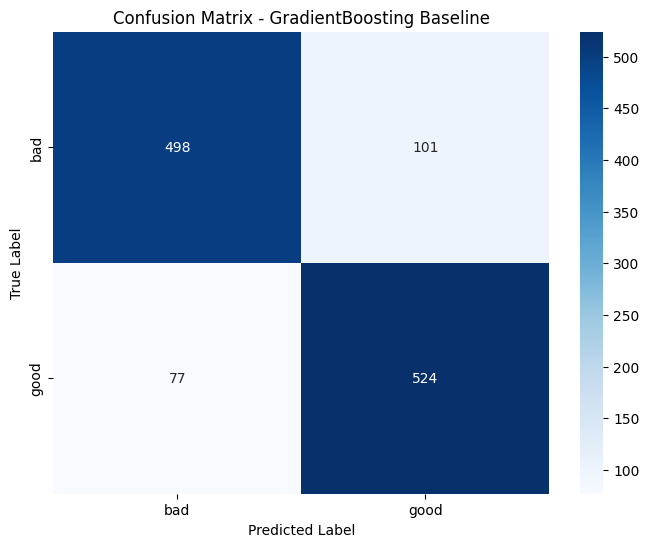

In [12]:
#Оценка качества
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
base_metrics = evaluate_model(y_test, y_pred, "GradientBoosting Baseline")

Модель градиентного бустинга показала хорошее и сбалансированное качество с метриками около 0.85, что подтверждает её эффективность для решения задачи.

### 3. Улучшение бейзлайна

Гипотеза 1: масштабирование признаков

Гипотеза 2: подбор гиперпараметров модели

Гипотеза 3: создание новых полиномиальных признаков


In [13]:
#Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Модель с масштабированными признаками
model_scaled = GradientBoostingClassifier()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

In [14]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_scaled):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_scaled):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_scaled):.4f}")

Accuracy: 0.8517
Precision: 0.8384
Recall: 0.8719
F1-score: 0.8548


После скалирования вырос Recall, снизился Precision. В результате этого смещения баланса F1-мера немного улучшилась.

In [16]:
#Подбор гиперпараметров
param_distributions = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

gb_tuned = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(
    gb_tuned,
    param_distributions,
    n_iter=10,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=0,
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 150]},
                   scoring='f1')

In [17]:
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший F1-score: {random_search.best_score_:.4f}")

Лучшие параметры: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}
Лучший F1-score: 0.8752


In [18]:
#Модель с лучшими гиперпараметрами
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)


In [20]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.4f}")


Accuracy: 0.8733
Precision: 0.8604
Recall: 0.8918
F1-Score: 0.8758


Подбор гиперпараметров позволил значительно улучшить модель по всем метрикам, особенно по полноте, которая выросла до 0.89.

In [21]:
#Создание пониномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [22]:
print(f"\nРазмерность данных до полиномиального преобразования: {X_train.shape}")
print(f"Размерность данных после полиномиального преобразования: {X_train_poly.shape}")


Размерность данных до полиномиального преобразования: (2800, 7)
Размерность данных после полиномиального преобразования: (2800, 35)


In [23]:
#Модель с полиномиальными признаками
model_new_features = GradientBoostingClassifier()
model_new_features.fit(X_train_poly, y_train)
y_pred_new_features = model_new_features.predict(X_test_poly)

In [24]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_new_features):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_new_features):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_new_features):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_new_features):.4f}")

Accuracy: 0.8642
Precision: 0.8454
Recall: 0.8918
F1-score: 0.8680


Добавление полиномиальных признаков улучшило модель по сравнению с бейзлайном. Однако этот прирост оказался меньше, чем от обычного подбора гиперпараметров, где все метрики были выше.

Применим все гипотезы и обучим "улучшенную модель"

In [25]:
#Применим скалирование с к созданным признакам
X_train_scaled2 = scaler.fit_transform(X_train_poly)
X_test_scaled2 = scaler.transform(X_test_poly)


Impoved GradientBoosting:
Accuracy: 0.8733
Precision: 0.8738
Recall: 0.8733
F1-score: 0.8733


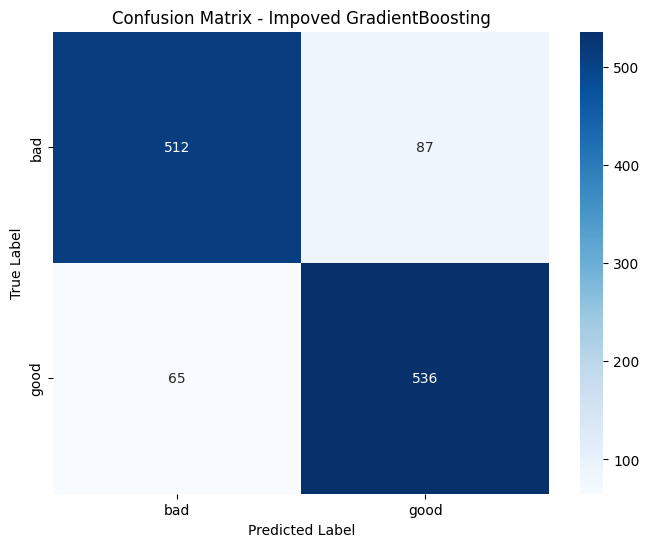

In [35]:
#Улучшенная модель
model_impoved = GradientBoostingClassifier(n_estimators = 150, max_depth = 5, learning_rate = 0.1)
model_impoved.fit(X_train_scaled2, y_train)
y_pred_impr = model_impoved.predict(X_test_scaled2)

improved_metrics = evaluate_model(y_test, y_pred_impr, 'Impoved GradientBoosting')

In [27]:
#Сравнение базовой и улучшенной моделей
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Base Model': [
        base_metrics['accuracy'],
        base_metrics['precision'],
        base_metrics['recall'],
        base_metrics['f1']
    ],
    'Improved Model': [
        improved_metrics['accuracy'],
        improved_metrics['precision'],
        improved_metrics['recall'],
        improved_metrics['f1']
    ]
})
print(comparison)

      Metric  Base Model  Improved Model
0   Accuracy    0.851667        0.873333
1  Precision    0.852220        0.873828
2     Recall    0.851667        0.873333
3   F1-Score    0.851602        0.873287


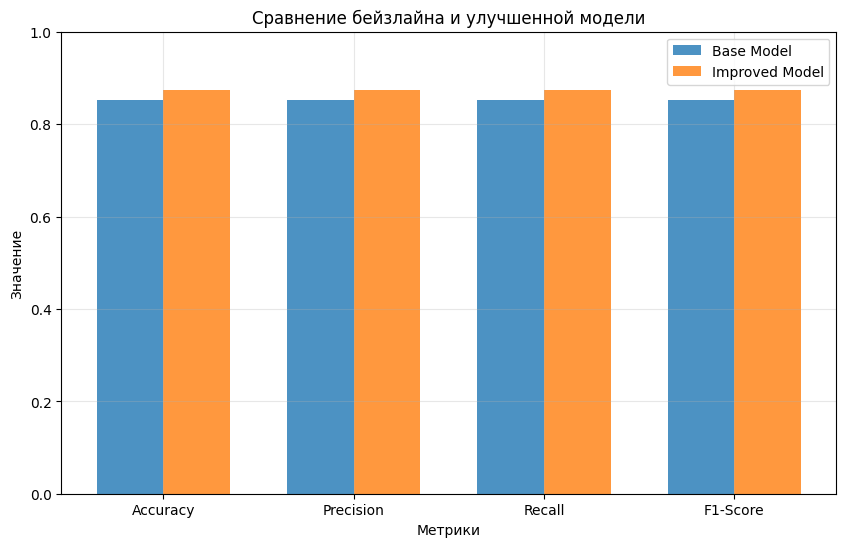

In [29]:
# Визуализация сравнения
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, comparison['Base Model'], width, label='Base Model', alpha=0.8)
plt.bar(x + width/2, comparison['Improved Model'], width, label='Improved Model', alpha=0.8)

plt.xlabel('Метрики')
plt.ylabel('Значение')
plt.title('Сравнение бейзлайна и улучшенной модели')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.show()

Улучшенная модель превосходит базовую по всем ключевым показателям. Внесенные оптимизации позволили повысить как общую точность, так и сбалансированность модели. Таким образом, примененные методы улучшения оказались эффективными.

### 4.	Имплементация алгоритма машинного обучения

In [31]:
#Реализация Gradient Boosting
class CustomGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.initial_prediction = None

    #Сигмоидная функция
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-np.clip(x, -10, 10)))

    #Градиент функции потерь log loss
    @staticmethod
    def log_loss_gradient(y_true, y_pred):
        return y_pred - y_true

    def fit(self, X, y):
        np.random.seed(self.random_state)

        #Начальное предсказание - логарифм отношения классов
        positive_ratio = np.mean(y)
        self.initial_prediction = np.log(positive_ratio / (1 - positive_ratio))

        #Начальные предсказания
        current_predictions = np.full_like(y, self.initial_prediction, dtype=float)

        from sklearn.tree import DecisionTreeRegressor

        for i in range(self.n_estimators):
            #Преобразуем в вероятности
            probabilities = self.sigmoid(current_predictions)

            #Вычисляем градиент
            gradient = self.log_loss_gradient(y, probabilities)

            #Обучаем дерево на градиенте
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                random_state=self.random_state + i
            )
            tree.fit(X, gradient)

            #Делаем предсказание деревом
            tree_prediction = tree.predict(X)

            #Обновляем текущие предсказания
            current_predictions -= self.learning_rate * tree_prediction

            #Сохраняем дерево
            self.trees.append(tree)

            if (i + 1) % 20 == 0:
                prob = self.sigmoid(current_predictions)
                pred = (prob >= 0.5).astype(int)
                acc = accuracy_score(y, pred)

    def predict_proba(self, X):
        #Начальное предсказание
        predictions = np.full((X.shape[0],), self.initial_prediction, dtype=float)

        #Добавляем вклад каждого дерева
        for tree in self.trees:
            predictions -= self.learning_rate * tree.predict(X)

        #Преобразуем в вероятности
        probabilities = self.sigmoid(predictions)

        return np.vstack([1 - probabilities, probabilities]).T

    def predict(self, X):
        probabilities = self.predict_proba(X)[:, 1]
        return (probabilities >= 0.5).astype(int)

In [32]:
#Обучение и предсказание кастомной модели
custom_rf = CustomGradientBoostingClassifier()
custom_rf.fit(X_train, y_train)

y_pred_custom = custom_rf.predict(X_test)


GradientBoosting Custom:
Accuracy: 0.8258
Precision: 0.8288
Recall: 0.8258
F1-score: 0.8254


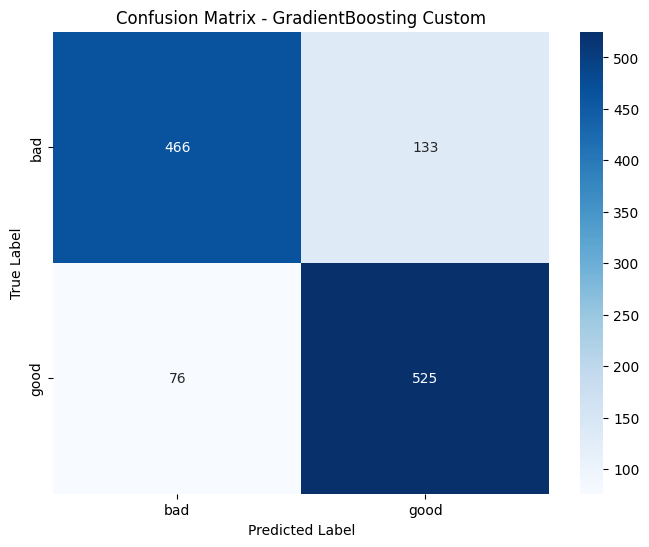

In [33]:
#Оценка качества
custom_metrics = evaluate_model(y_test, y_pred_custom, "GradientBoosting Custom")

Модель обучается и предсказывает корректно. Однако кастомная  реализация градиентного бустинга показала более низкое качество, чем библиотечный baseline: все метрики просели примерно до 0.825.

In [36]:
#Применяем лучшие гиперпараметры из GridSearch, увеличение признаков и масштабирование к кастомной модели
custom_improved = CustomGradientBoostingClassifier(n_estimators = 150, max_depth = 5, learning_rate = 0.1)
custom_improved.fit(X_train_scaled2, y_train)
y_pred_improved_custom = custom_improved.predict(X_test_scaled2)


GradientBoosting Improved Custom:
Accuracy: 0.8583
Precision: 0.8586
Recall: 0.8583
F1-score: 0.8583


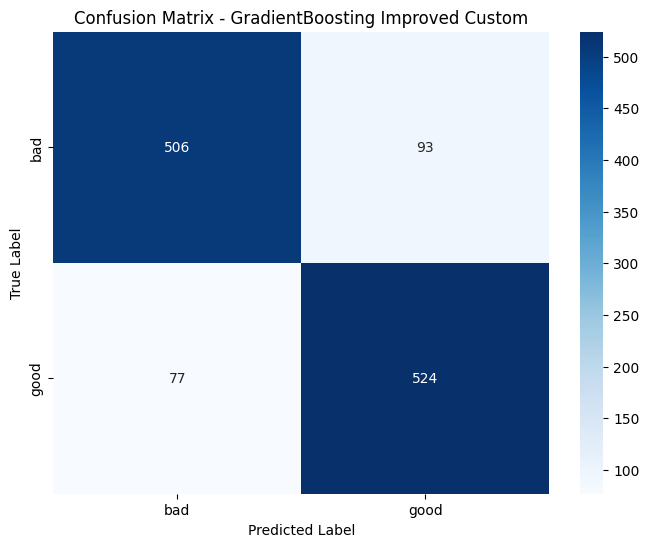

In [37]:
#Оценка качества
custom_impoved_metrics = evaluate_model(y_test, y_pred_improved_custom, "GradientBoosting Improved Custom")

In [39]:
#Сравнение всех метрик всех моделей
comparison_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Baseline GB': [
        base_metrics['accuracy'],
        base_metrics['precision'],
        base_metrics['recall'],
        base_metrics['f1']
    ],
    'Improved GB': [
        improved_metrics['accuracy'],
        improved_metrics['precision'],
        improved_metrics['recall'],
        improved_metrics['f1']
    ],
    'Custom GB': [
        custom_metrics['accuracy'],
        custom_metrics['precision'],
        custom_metrics['recall'],
        custom_metrics['f1']
    ],
    'Custom Improved GB': [
        custom_impoved_metrics['accuracy'],
        custom_impoved_metrics['precision'],
        custom_impoved_metrics['recall'],
        custom_impoved_metrics['f1']
    ]
})

print(comparison_metrics.to_string(index=False))

   Metric  Baseline GB  Improved GB  Custom GB  Custom Improved GB
 Accuracy     0.851667     0.873333   0.825833            0.858333
Precision     0.852220     0.873828   0.828774            0.858582
   Recall     0.851667     0.873333   0.825833            0.858333
 F1-score     0.851602     0.873287   0.825426            0.858305


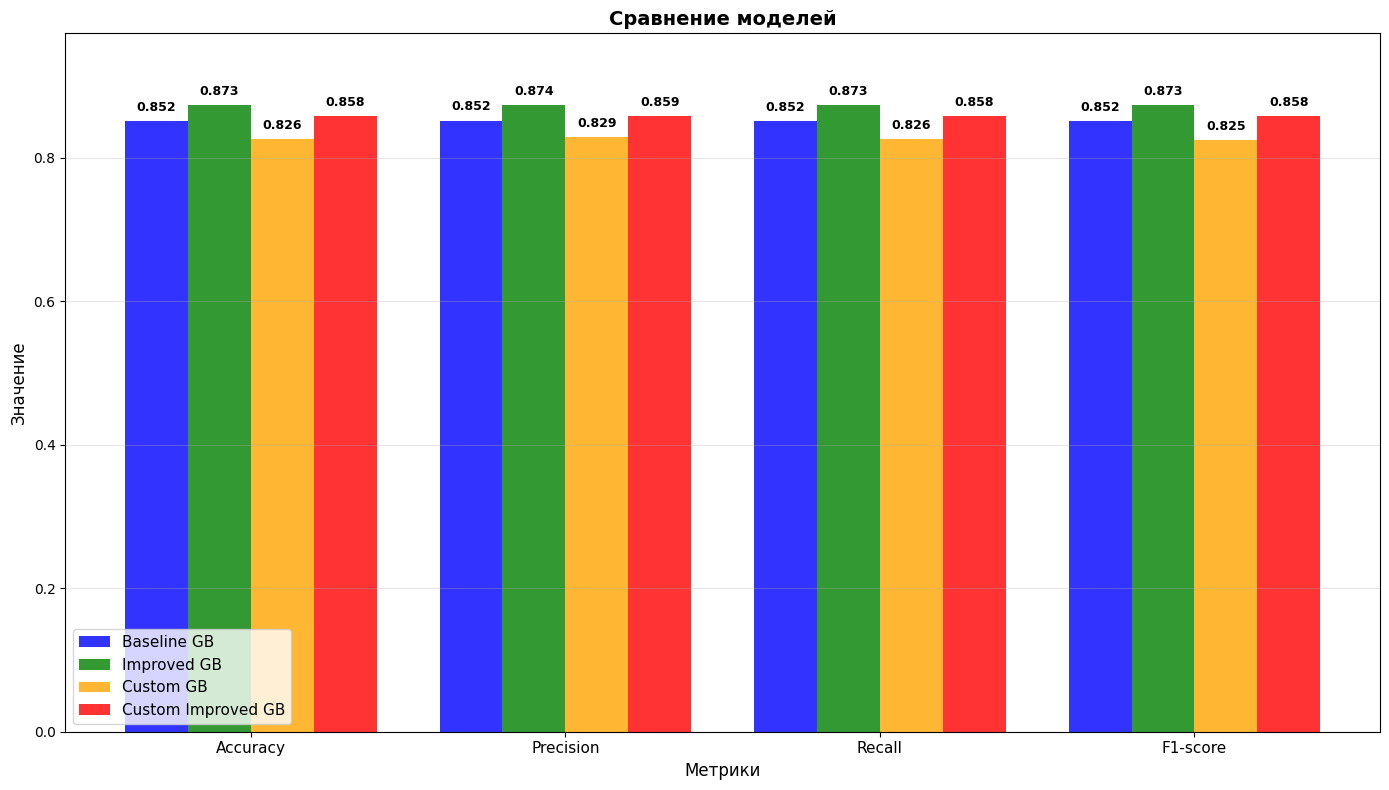

In [41]:
#Визуализация сравнения
plt.figure(figsize=(14, 8))
x = np.arange(len(comparison_metrics))
width = 0.2

plt.bar(x - width*1.5, comparison_metrics['Baseline GB'], width,
        label='Baseline GB', alpha=0.8, color='blue')
plt.bar(x - width/2, comparison_metrics['Improved GB'], width,
        label='Improved GB', alpha=0.8, color='green')
plt.bar(x + width/2, comparison_metrics['Custom GB'], width,
        label='Custom GB', alpha=0.8, color='orange')
plt.bar(x + width*1.5, comparison_metrics['Custom Improved GB'], width,
        label='Custom Improved GB', alpha=0.8, color='red')

plt.xlabel('Метрики', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title('Сравнение моделей', fontsize=14, fontweight='bold')
plt.xticks(x, comparison_metrics['Metric'], fontsize=11)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

#Добавляем значения над столбцами
for i in range(len(comparison_metrics)):
    plt.text(i - width*1.5, comparison_metrics['Baseline GB'][i] + 0.01,
             f'{comparison_metrics["Baseline GB"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i - width/2, comparison_metrics['Improved GB'][i] + 0.01,
             f'{comparison_metrics["Improved GB"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width/2, comparison_metrics['Custom GB'][i] + 0.01,
             f'{comparison_metrics["Custom GB"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width*1.5, comparison_metrics['Custom Improved GB'][i] + 0.01,
             f'{comparison_metrics["Custom Improved GB"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Настраиваем пределы оси Y
max_val = max([comparison_metrics['Baseline GB'].max(), comparison_metrics['Improved GB'].max(), comparison_metrics['Custom GB'].max(), comparison_metrics['Custom Improved GB'].max()]) + 0.1
plt.ylim(0, min(max_val, 1.0))

plt.tight_layout()
plt.show()

Улучшенная GB показала лучший результат с метриками ~0.873, существенно опередив бейзлайн версию. Упрощённая кастомная модель изначально отставала, но её улучшенная версия достигла качества ~0.858, почти сравнявшись с бейзлайном.

## Задача регресии

### 2. Создание бейзлайна и оценка качества

### 3. Улучшение бейзлайна

### 4.	Имплементация алгоритма машинного обучения